# ML PAT - Admission
### Name : Tulasi Raman R
### Register Number : 21MIS1170

# Importing Libraries

In [180]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report

# Importing Dataset

In [181]:
dataset = pd.read_csv("Admission.csv")
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [182]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### Fortunately we don't have any missing values. There's no need to drop any missing values rows.

In [183]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Preprocessing

array([[<Axes: title={'center': 'Serial No.'}>,
        <Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>],
       [<Axes: title={'center': 'University Rating'}>,
        <Axes: title={'center': 'SOP'}>,
        <Axes: title={'center': 'LOR '}>],
       [<Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit '}>]], dtype=object)

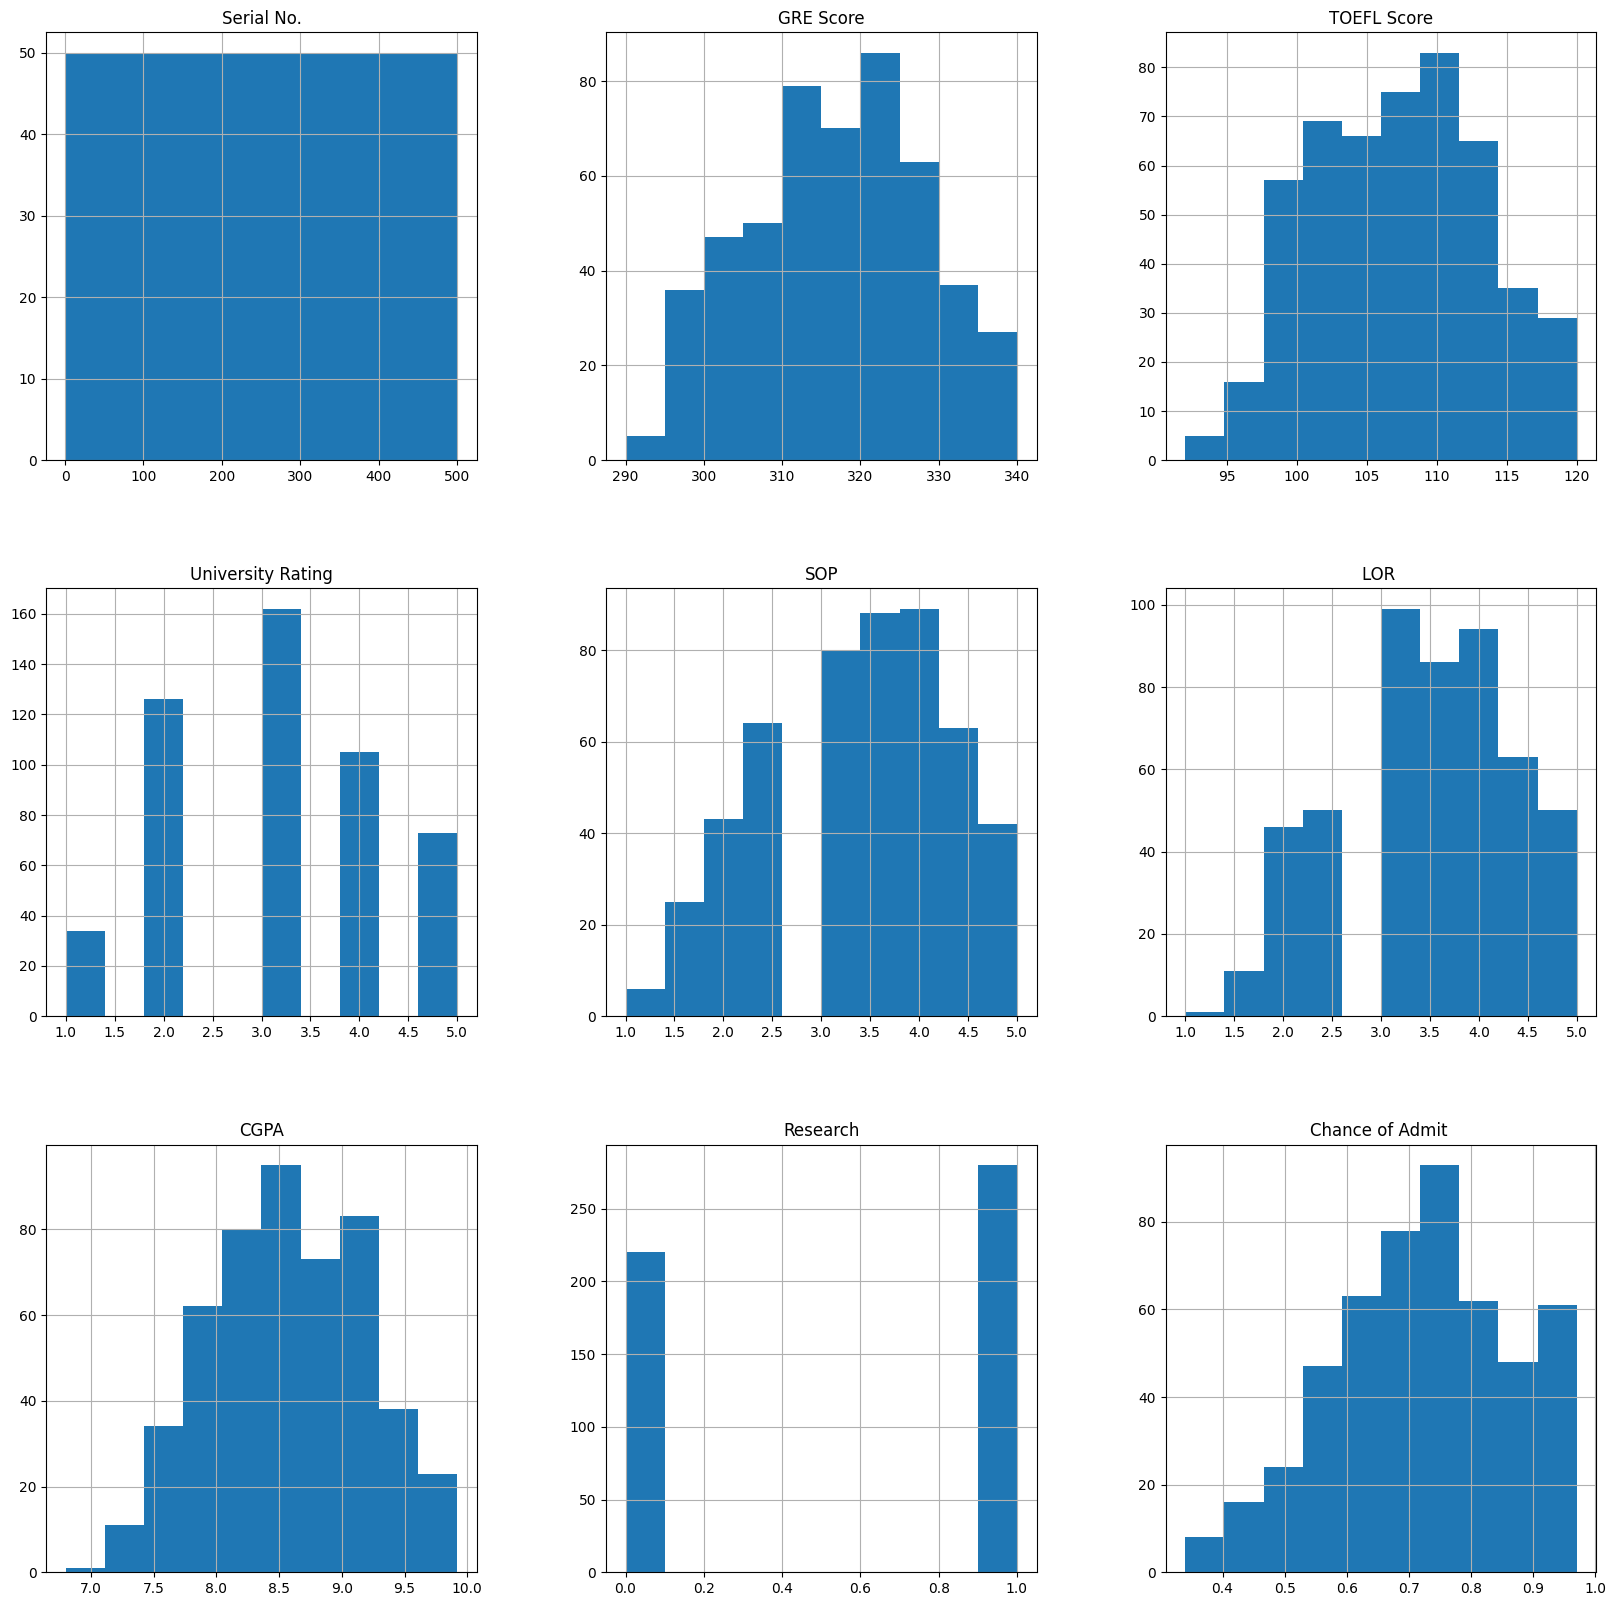

In [184]:
dataset.hist(figsize=(20,20))

In [185]:
dataset = dataset.drop(columns=['Serial No.'])

### Here we are removing Serial No. from the dataset as it won't contribute to the model in anyway.

As it  can be seen from Data Preprocessing section above, graduate admission data is only include numerical variables. Hence, only the following steps should be implemented before model devolopment:

* The outcome variable is 'Chance of Admit', and all other features are predictors.

In [186]:
dataset.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

# Finding Correlation

In [187]:
corr_matrix = dataset.corr()
print(corr_matrix)

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.827200           0.635376  0.613498   
TOEFL Score         0.827200     1.000000           0.649799  0.644410   
University Rating   0.635376     0.649799           1.000000  0.728024   
SOP                 0.613498     0.644410           0.728024  1.000000   
LOR                 0.524679     0.541563           0.608651  0.663707   
CGPA                0.825878     0.810574           0.705254  0.712154   
Research            0.563398     0.467012           0.427047  0.408116   
Chance of Admit     0.810351     0.792228           0.690132  0.684137   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.524679  0.825878  0.563398          0.810351  
TOEFL Score        0.541563  0.810574  0.467012          0.792228  
University Rating  0.608651  0.705254  0.427047          0.690132  
SOP                0.663707  0.712154  0.408116          0.68

In [188]:
top_corr_features = corr_matrix.index

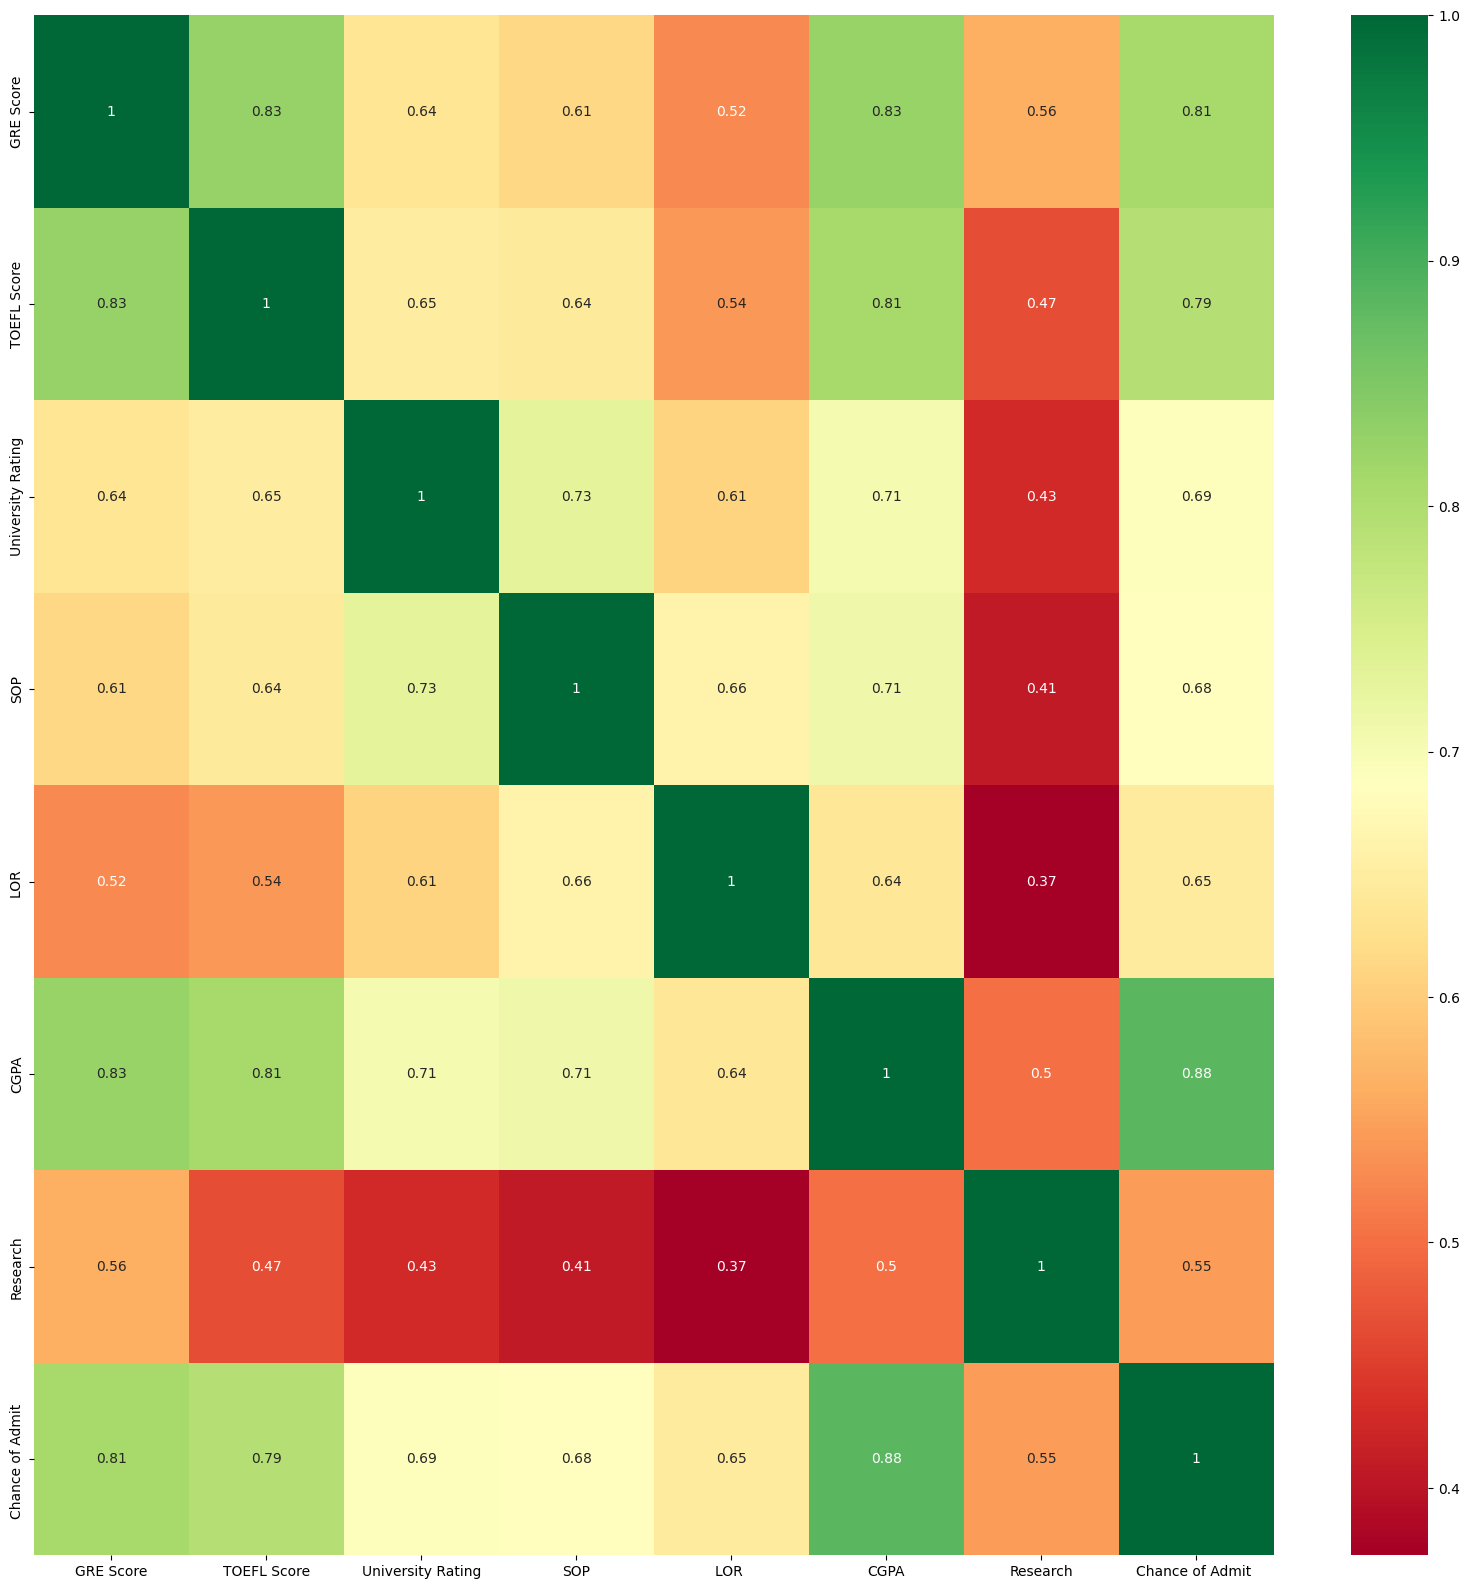

In [189]:
plt.figure(figsize=(20,20))
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### We can notice that 'CGPA' paramater is highly correlated with 'Chance of Admit', while 'Research' is least correlated with 'Chance of Admit'. So from the heatmap we can come to a conclusion that correlation between all the parameters and in case of 'Chance of Admit' it is highest with 'CGPA' parameter.

In [190]:
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Splitting Dataset

In [266]:
X = dataset.iloc[:, :-1]
# X = dataset.drop(['Research'], axis=1)
y = dataset.iloc[:, -1]

### Dependant variables are assigned to X and the target variable is assigned to y

In [267]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [268]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

# Splitting train and test data

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [270]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

xs= MinMaxScaler()
X_train[X_train.columns] = xs.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = xs.transform(X_test[X_test.columns])

**MIN - MAX Scaler**
its Better use always the Scaler methods to improve the Accuracy  

# Feature Scaling

In [271]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [272]:
y_pred = reg.predict(X_test)

In [273]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
361,0.93,0.917415
73,0.84,0.795863
374,0.39,0.573314
155,0.77,0.712969
104,0.74,0.817665
...,...,...
266,0.72,0.659250
23,0.95,0.966054
222,0.76,0.785610
261,0.71,0.642338


# Performance Metrics

In [274]:
r2 = r2_score(y_test, y_pred) 
print('r2 score: ', r2)

r2 score:  0.8256306039919491


In [275]:
reg.coef_

array([0.10482208, 0.09597818, 0.01238029, 0.00606024, 0.05326976,
       0.36124417, 0.02074951])

In [276]:
reg.intercept_

0.36144125291543655

In [277]:
mse = mean_squared_error (y_test, y_pred)
print("Mean Square Error: ", mse)

Mean Square Error:  0.0036342178012511036


In [278]:
rmse = np.sqrt(mse)
print("Root Mean Square Error: ", rmse)

Root Mean Square Error:  0.06028447396511894


#### Model Interpretation
### Why linear regression?
- Multiple Linear Regression is used to model a relationship between more than two continuous variables. Linear Regression describes the correlation between an independent and a possible dependent varibales. Here our dataset has 8 dependent and 1 independent features and hence it will be the best suit.

### Model Observation
- Interept is 0.36 which means when all the parameters are 0, the 'Chance of Admit' is 36%
- R square(coefficient of determination) tells us how many points fall on the regression plane. Here we have a R2 score of 83% which means 83% of the dataset variables lie of the regression plane.
- Root Mean Square Error is the measure of average difference between values predicted by a model and the actual values. We have obtained a RMSE value of 0.059, so the error is found to be almost neglible, which is means the model is trained well.